
# **DATA PREPARATION**
**Tahapan persiapan data dimulai dengan proses Import - Membaca Data,**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
file_path = '/content/student_lifestyle_dataset.csv'
data = pd.read_csv(file_path)
data.head()

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Student_ID                       2000 non-null   int64  
 1   Study_Hours_Per_Day              2000 non-null   float64
 2   Extracurricular_Hours_Per_Day    2000 non-null   float64
 3   Sleep_Hours_Per_Day              2000 non-null   float64
 4   Social_Hours_Per_Day             2000 non-null   float64
 5   Physical_Activity_Hours_Per_Day  2000 non-null   float64
 6   GPA                              2000 non-null   float64
 7   Stress_Level                     2000 non-null   object 
dtypes: float64(6), int64(1), object(1)
memory usage: 125.1+ KB


**Encoding data dan menghapus kolom yang tidak diperlukan**

In [ ]:
data = pd.get_dummies(data, columns=['Stress_Level'], drop_first=True)
data = data.drop('Student_ID', axis=1)

# **EDA**


**Cara Membaca Heatmap:**

-Warna: Menunjukkan seberapa kuat hubungan antar variabel, dengan warna gelap atau terang menunjukkan nilai tinggi atau rendah.
                                                             
  -Korelasi:                              
 **Positif (dekat 1)**: Saat satu variabel naik, yang lainnya juga naik.                 
**Negatif (dekat -1)**: Saat satu variabel naik, yang lainnya turun.   
**Dekat 0**: Tidak ada hubungan yang jelas.

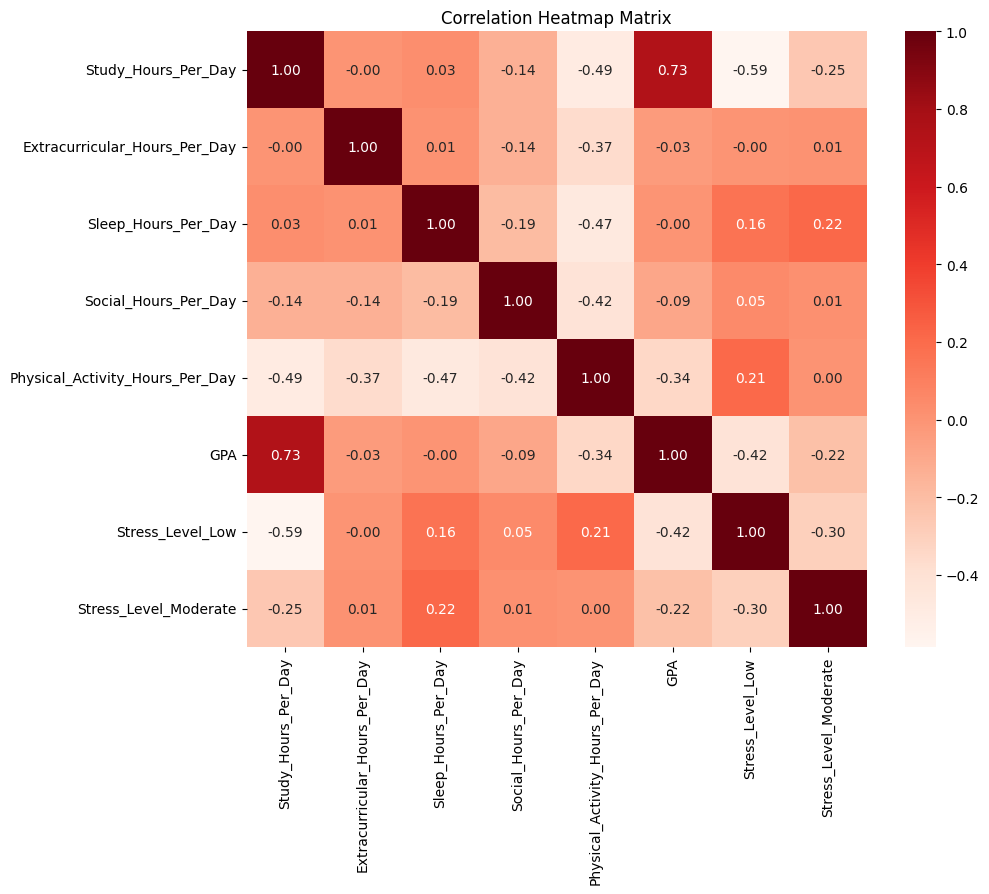

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Heatmap Matrix')
plt.show()

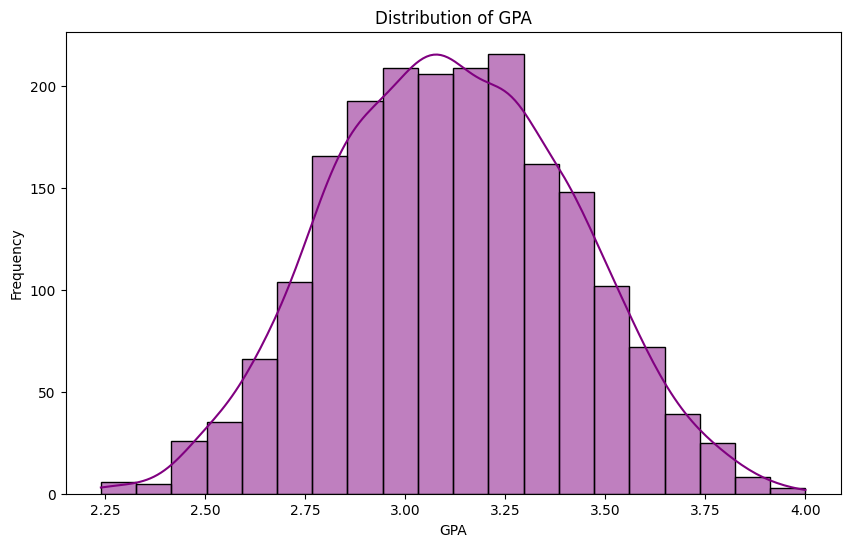

In [ ]:
# Memvisualisasi distribusi GPA
plt.figure(figsize=(10, 6))
sns.histplot(data['GPA'], bins=20, kde=True, color='purple')
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.show()

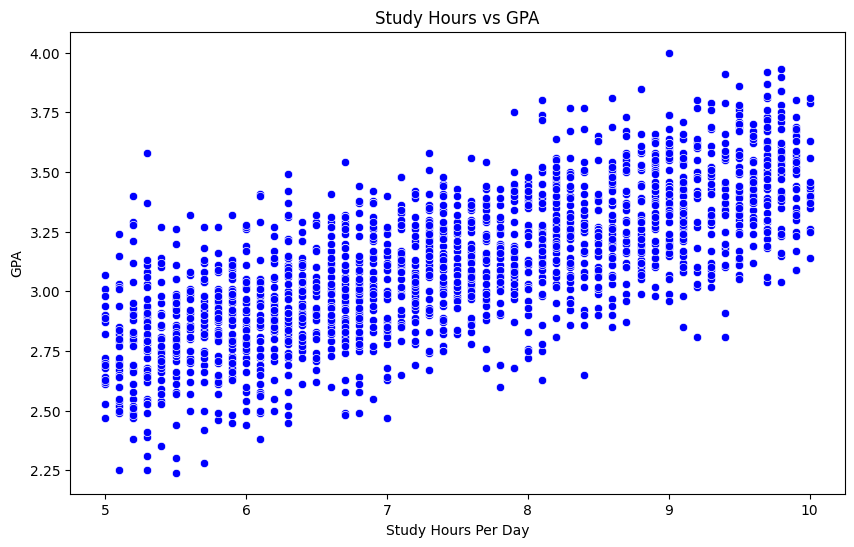

In [ ]:
# Memvisualisasikan hubungan antara Study Hours dan GPA
plt.figure(figsize=(10, 6))

sns.scatterplot(x='Study_Hours_Per_Day', y='GPA', data=data, color='blue')

plt.title('Study Hours vs GPA')
plt.xlabel('Study Hours Per Day')
plt.ylabel('GPA')
plt.show()

# **PREPROCESSING DATA**

**Mengecek missing values dan duplikasi data**

In [ ]:
print("\nMissing Values:")
print(data.isnull().sum())
print("\nNumber of duplicate rows:")
print(data.duplicated().sum())


Missing Values:
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    0
GPA                                0
Stress_Level_Low                   0
Stress_Level_Moderate              0
dtype: int64

Number of duplicate rows:
0


**Visualisasi dan mengidentifikasi outlier**

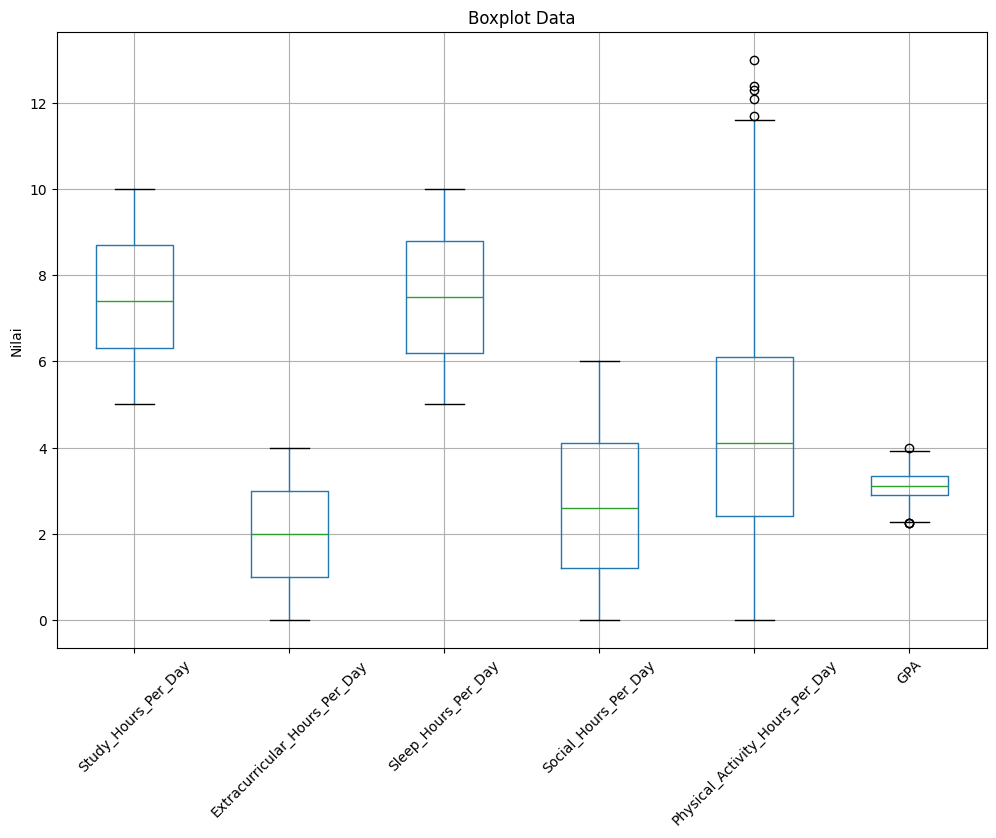

Data Outlier:
Study_Hours_Per_Day                0
Extracurricular_Hours_Per_Day      0
Sleep_Hours_Per_Day                0
Social_Hours_Per_Day               0
Physical_Activity_Hours_Per_Day    5
GPA                                4
dtype: int64


In [ ]:
import warnings

warnings.filterwarnings('ignore')

numerical_cols = ['Study_Hours_Per_Day', 'Extracurricular_Hours_Per_Day', 'Sleep_Hours_Per_Day',
                  'Social_Hours_Per_Day', 'Physical_Activity_Hours_Per_Day', 'GPA']

plt.figure(figsize=(12, 8))
data[numerical_cols].boxplot()
plt.title('Boxplot Data')
plt.ylabel('Nilai')
plt.xticks(rotation=45)
plt.show()

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((data[numerical_cols] < (Q1 - 1.5 * IQR)) | (data[numerical_cols] > (Q3 + 1.5 * IQR))).sum()
print('Data Outlier:')
print(outliers)

# **DATA PROCESSING**

**Membagi Data untuk training dan testing**

In [ ]:
X = data.drop('GPA', axis=1)
y = data['GPA']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1600, 7)
y_train shape: (1600,)
X_test shape: (400, 7)
y_test shape: (400,)


# **DATA MODELLING**

In [ ]:
# Model Linear Reggresion
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

lr_mse = mean_squared_error(y_test, y_pred)
lr_r2 = r2_score(y_test, y_pred)

print("\nLinear Regression Model Results:")
print(f"Mean Squared Error (MSE): {lr_mse}")
print(f"R-Squared Score (R2): {lr_r2}")


Linear Regression Model Results:
Mean Squared Error (MSE): 0.042259490075701754
R-Squared Score (R2): 0.5473647591731501


In [ ]:
# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rf_mse = mean_squared_error(y_test, y_pred)
rf_r2 = r2_score(y_test, y_pred)

print("\nRandom Forest Model Results:")
print(f"Mean Squared Error (MSE): {rf_mse}")
print(f"R-Squared Score (R2): {rf_r2}")


Random Forest Model Results:
Mean Squared Error (MSE): 0.052023201924999984
R-Squared Score (R2): 0.44278706416655267


# **EVALUATION**


Model Comparison:
               Model       MSE        R2
0  Linear Regression  0.042259  0.547365
1      Random Forest  0.052023  0.442787


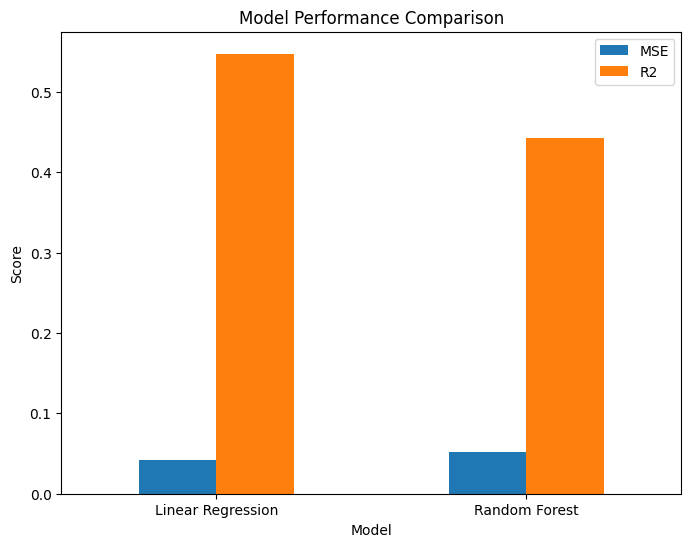

In [ ]:
# Membandingkan model
comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MSE": [lr_mse, rf_mse],
    "R2": [lr_r2, rf_r2]
})

print("\nModel Comparison:")
print(comparison)

# Memvisualisasikan perbandingan model
comparison.set_index("Model").plot(kind="bar", figsize=(8, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

**Visualisasi Hasil Prediksi vs Nilai Aktual**

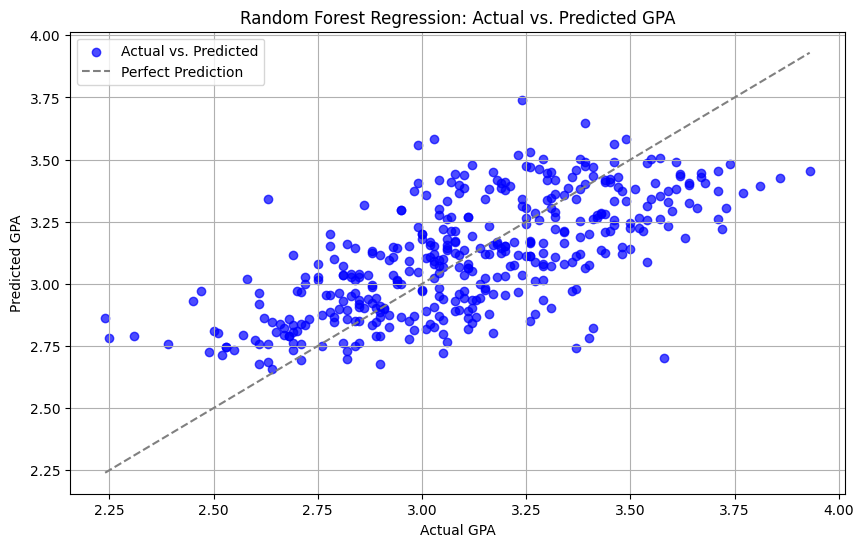

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7, label='Actual vs. Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Perfect Prediction')

plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Random Forest Regression: Actual vs. Predicted GPA')

plt.legend()
plt.grid(True)
plt.show()

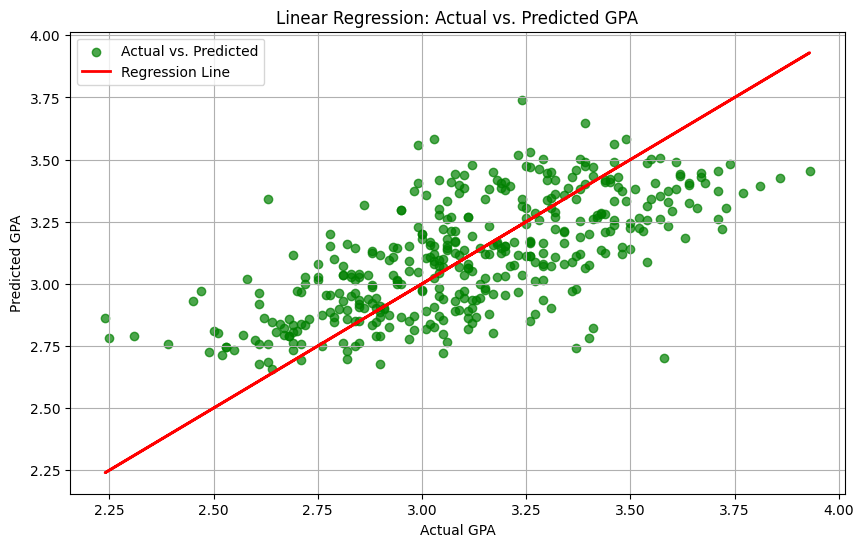

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='green', alpha=0.7, label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Actual GPA')
plt.ylabel('Predicted GPA')
plt.title('Linear Regression: Actual vs. Predicted GPA')

plt.legend()
plt.grid(True)
plt.show()